<a href="https://colab.research.google.com/github/AjayJohnAlex/Logistic-Regression/blob/master/GEO_Demographic_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import statsmodels.api as sm
%matplotlib inline

In [0]:
import seaborn as sns

In [3]:
df = pd.read_csv('/content/P12-Churn-Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.set_index('RowNumber',inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df = pd.get_dummies(df,drop_first=True,columns=['Gender'])
df = pd.get_dummies(df,columns=['Geography'],drop_first=True)
df.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [0]:
X = df.drop(['Exited','CustomerId','Surname'],axis=1)
y = df[['Exited']]

In [14]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,0,0,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1
3,502,42,8,159660.80,3,1,0,113931.57,0,0,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [15]:
y.head()

,Exited
RowNumber,
1,1
2,0
3,1
4,0
5,0


In [0]:
logistic_model = sm.OLS(y,X).fit()

In [35]:
logistic_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              434.0
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:19:24   Log-Likelihood:                         -4280.5
No. Observations:               10000   AIC:                                      8583.
Df Residuals:                    9989   BIC:                                      8662.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002    2.6e-05     -6.197      0.000      -0.000      -0.000
Age                   0.0107      0.000     33.208      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.961      0.050      -0.005   -9.44e-07
Balance            2.778e-07   6.71e-08      4.138      0.000    1.46e-07    4.09e-07
NumOfProducts        -0.0213      0.006     -3.363      0.001      -0.034      -0.009
HasCrCard            -0.0085      0.008     -1.055      0.292      -0.024       0.007
IsActiveMember       -0.1422      0.007    -19.071      0.000      -0.157      -0.128
EstimatedSalary    3.923e-08   6.34e-08      0.618      0.536   -8.51e-08    1.64e-07
Gender_Male          -0.0769      0.007    -10.388      0.000      -0.091      -0.062
Geography_Germany     0.1268      0.010     12.793      0.000       0.107       0.146
Geography_Spain       0.0024      0.009      0.262      0.793      -0.015       0.020
==============================================================================
Omnibus:                     1493.533   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.708
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     4.11e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
X1 = X.drop('Geography_Spain',axis=1)
log_model1 = sm.OLS(y,X1).fit()
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              477.5
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:19:35   Log-Likelihood:                         -4280.6
No. Observations:               10000   AIC:                                      8581.
Df Residuals:                    9990   BIC:                                      8653.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002   2.59e-05     -6.199      0.000      -0.000      -0.000
Age                   0.0108      0.000     33.266      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.956      0.050      -0.005    4.76e-06
Balance            2.781e-07   6.71e-08      4.143      0.000    1.47e-07     4.1e-07
NumOfProducts        -0.0213      0.006     -3.356      0.001      -0.034      -0.009
HasCrCard            -0.0085      0.008     -1.054      0.292      -0.024       0.007
IsActiveMember       -0.1422      0.007    -19.070      0.000      -0.157      -0.128
EstimatedSalary    3.943e-08   6.34e-08      0.621      0.534   -8.49e-08    1.64e-07
Gender_Male          -0.0769      0.007    -10.385      0.000      -0.091      -0.062
Geography_Germany     0.1260      0.009     13.359      0.000       0.108       0.145
==============================================================================
Omnibus:                     1493.571   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.768
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     3.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
X2 = X1.drop('EstimatedSalary',axis=1)
log_model2 = sm.OLS(y,X2).fit()
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              530.5
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:19:48   Log-Likelihood:                         -4280.8
No. Observations:               10000   AIC:                                      8580.
Df Residuals:                    9991   BIC:                                      8644.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002   2.53e-05     -6.208      0.000      -0.000      -0.000
Age                   0.0108      0.000     33.433      0.000       0.010       0.011
Tenure               -0.0024      0.001     -1.930      0.054      -0.005    3.75e-05
Balance            2.806e-07    6.7e-08      4.188      0.000    1.49e-07    4.12e-07
NumOfProducts        -0.0209      0.006     -3.313      0.001      -0.033      -0.009
HasCrCard            -0.0083      0.008     -1.039      0.299      -0.024       0.007
IsActiveMember       -0.1422      0.007    -19.070      0.000      -0.157      -0.128
Gender_Male          -0.0768      0.007    -10.376      0.000      -0.091      -0.062
Geography_Germany     0.1260      0.009     13.356      0.000       0.107       0.144
==============================================================================
Omnibus:                     1493.130   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2271.808
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.214   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
X3 = X2.drop('HasCrCard',axis=1)
log_model3 = sm.OLS(y,X3).fit()
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              596.7
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        17:20:07   Log-Likelihood:                         -4281.3
No. Observations:               10000   AIC:                                      8579.
Df Residuals:                    9992   BIC:                                      8636.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002   2.48e-05     -6.556      0.000      -0.000      -0.000
Age                   0.0107      0.000     33.449      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.995      0.046      -0.005    -4.4e-05
Balance             2.79e-07    6.7e-08      4.166      0.000    1.48e-07     4.1e-07
NumOfProducts        -0.0214      0.006     -3.390      0.001      -0.034      -0.009
IsActiveMember       -0.1422      0.007    -19.071      0.000      -0.157      -0.128
Gender_Male          -0.0770      0.007    -10.413      0.000      -0.092      -0.063
Geography_Germany     0.1259      0.009     13.347      0.000       0.107       0.144
==============================================================================
Omnibus:                     1494.960   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2275.646
Skew:                           1.164   Prob(JB):                         0.00
Kurtosis:                       3.215   Cond. No.                     2.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

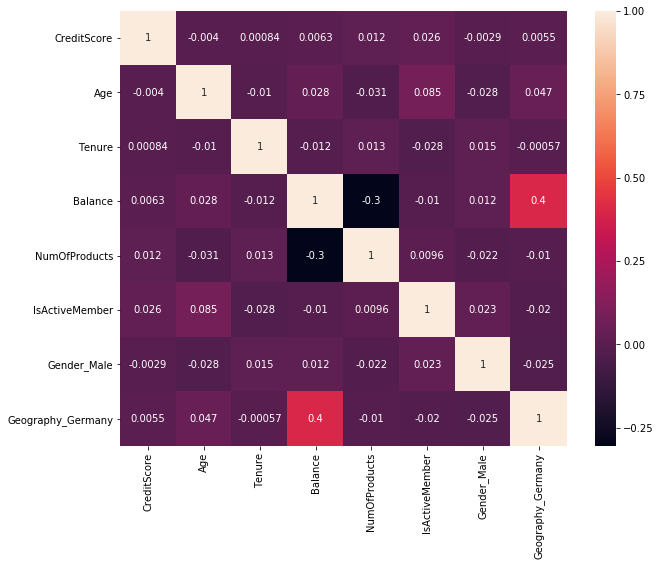

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(X3.corr(),annot=True)

In [46]:
#  transformation
X3['log_balance'] = np.log10(X3['Balance'] + 1)
X3.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,IsActiveMember,Gender_Male,Geography_Germany,log_balance
RowNumber,,,,,,,,,
1,619,42,2,0.00,1,1,0,0,0.000000
2,608,41,1,83807.86,1,1,0,0,4.923290
3,502,42,8,159660.80,3,0,0,0,5.203201
4,699,39,1,0.00,2,0,0,0,0.000000
5,850,43,2,125510.82,1,1,0,0,5.098685


In [47]:
X4 = X3.drop('Balance',axis=1)
log_model4 = sm.OLS(y,X4).fit()
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.323
Model:                            OLS   Adj. R-squared (uncentered):              0.323
Method:                 Least Squares   F-statistic:                              596.1
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        18:17:32   Log-Likelihood:                         -4282.8
No. Observations:               10000   AIC:                                      8582.
Df Residuals:                    9992   BIC:                                      8639.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore          -0.0002    2.5e-05     -6.502      0.000      -0.000      -0.000
Age                   0.0107      0.000     33.367      0.000       0.010       0.011
Tenure               -0.0025      0.001     -1.988      0.047      -0.005   -3.56e-05
NumOfProducts        -0.0213      0.006     -3.348      0.001      -0.034      -0.009
IsActiveMember       -0.1424      0.007    -19.091      0.000      -0.157      -0.128
Gender_Male          -0.0768      0.007    -10.381      0.000      -0.091      -0.062
Geography_Germany     0.1257      0.010     13.053      0.000       0.107       0.145
log_balance           0.0067      0.002      3.788      0.000       0.003       0.010
==============================================================================
Omnibus:                     1497.550   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2281.007
Skew:                           1.165   Prob(JB):                         0.00
Kurtosis:                       3.217   Cond. No.                     1.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# creating derived variable
X4['Wealth_accumulation'] = X4['log_balance']/X4['Age']
X4.head()

,CreditScore,Age,Tenure,NumOfProducts,IsActiveMember,Gender_Male,Geography_Germany,log_balance,Wealth_accumulation
RowNumber,,,,,,,,,
1,619,42,2,1,1,0,0,0.000000,0.000000
2,608,41,1,1,1,0,0,4.923290,0.120080
3,502,42,8,3,0,0,0,5.203201,0.123886
4,699,39,1,2,0,0,0,0.000000,0.000000
5,850,43,2,1,1,0,0,5.098685,0.118574


In [50]:
linear_model5 = sm.OLS(y,X4).fit()
linear_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.326
Model:                            OLS   Adj. R-squared (uncentered):              0.325
Method:                 Least Squares   F-statistic:                              536.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        18:23:24   Log-Likelihood:                         -4263.3
No. Observations:               10000   AIC:                                      8545.
Df Residuals:                    9991   BIC:                                      8609.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
CreditScore          -8.33e-05   2.81e-05     -2.969      0.003      -0.000   -2.83e-05
Age                     0.0089      0.000     20.453      0.000       0.008       0.010
Tenure                 -0.0019      0.001     -1.531      0.126      -0.004       0.001
NumOfProducts          -0.0159      0.006     -2.490      0.013      -0.028      -0.003
IsActiveMember         -0.1385      0.007    -18.548      0.000      -0.153      -0.124
Gender_Male            -0.0744      0.007    -10.065      0.000      -0.089      -0.060
Geography_Germany       0.1227      0.010     12.751      0.000       0.104       0.142
log_balance             0.0383      0.005      7.148      0.000       0.028       0.049
Wealth_accumulation    -1.1038      0.177     -6.249      0.000      -1.450      -0.758
==============================================================================
Omnibus:                     1493.493   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2269.079
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       3.246   Cond. No.                     3.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
X5 = X4.drop('Tenure',axis=1)
linear_model6 = sm.OLS(y,X5).fit()
linear_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.326
Model:                            OLS   Adj. R-squared (uncentered):              0.325
Method:                 Least Squares   F-statistic:                              602.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        18:24:40   Log-Likelihood:                         -4264.5
No. Observations:               10000   AIC:                                      8545.
Df Residuals:                    9992   BIC:                                      8603.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
CreditScore         -9.102e-05   2.76e-05     -3.298      0.001      -0.000   -3.69e-05
Age                     0.0088      0.000     20.411      0.000       0.008       0.010
NumOfProducts          -0.0167      0.006     -2.622      0.009      -0.029      -0.004
IsActiveMember         -0.1383      0.007    -18.517      0.000      -0.153      -0.124
Gender_Male            -0.0749      0.007    -10.135      0.000      -0.089      -0.060
Geography_Germany       0.1228      0.010     12.758      0.000       0.104       0.142
log_balance             0.0388      0.005      7.244      0.000       0.028       0.049
Wealth_accumulation    -1.1235      0.176     -6.377      0.000      -1.469      -0.778
==============================================================================
Omnibus:                     1495.679   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2273.716
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       3.246   Cond. No.                     3.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X5 = sm.add_constant(X5)
linear_model6 = sm.OLS(y,X5).fit()
linear_model6.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     225.7
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:30:38   Log-Likelihood:                -4264.5
No. Observations:               10000   AIC:                             8547.
Df Residuals:                    9991   BIC:                             8612.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0028      0.036      0.079      0.937      -0.067       0.072
CreditScore         -9.312e-05   3.84e-05     -2.426      0.015      -0.000   -1.79e-05
Age                     0.0088      0.001     16.472      0.000       0.008       0.010
NumOfProducts          -0.0169      0.007     -2.473      0.013      -0.030      -0.004
IsActiveMember         -0.1383      0.007    -18.513      0.000      -0.153      -0.124
Gender_Male            -0.0750      0.007    -10.052      0.000      -0.090      -0.060
Geography_Germany       0.1228      0.010     12.743      0.000       0.104       0.142
log_balance             0.0389      0.006      6.836      0.000       0.028       0.050
Wealth_accumulation    -1.1302      0.196     -5.771      0.000      -1.514      -0.746
==============================================================================
Omnibus:                     1496.202   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2274.830
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       3.246   Cond. No.                     3.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
X5.shape

(10000, 9)

In [56]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif["features"] = X5.columns
vif

,VIF Factor,features
0,91.699181,const
1,1.001038,CreditScore
2,2.283443,Age
3,1.153262,NumOfProducts
4,1.013581,IsActiveMember
5,1.002678,Gender_Male
6,1.269872,Geography_Germany
7,13.971124,log_balance
8,14.565964,Wealth_accumulation


In [57]:
X5['log_WA'] = np.log10(X5['Wealth_accumulation']+1)
X5.head()

,const,CreditScore,Age,NumOfProducts,IsActiveMember,Gender_Male,Geography_Germany,log_balance,Wealth_accumulation,log_WA
RowNumber,,,,,,,,,,
1,1.0,619,42,1,1,0,0,0.000000,0.000000,0.000000
2,1.0,608,41,1,1,0,0,4.923290,0.120080,0.049249
3,1.0,502,42,3,0,0,0,5.203201,0.123886,0.050722
4,1.0,699,39,2,0,0,0,0.000000,0.000000,0.000000
5,1.0,850,43,1,1,0,0,5.098685,0.118574,0.048665


In [59]:
linear_model7 = sm.OLS(y,X5).fit()
linear_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Exited   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     204.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:54:56   Log-Likelihood:                -4248.1
No. Observations:               10000   AIC:                             8516.
Df Residuals:                    9990   BIC:                             8588.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0516      0.036      1.415      0.157      -0.020       0.123
CreditScore         -9.131e-05   3.83e-05     -2.382      0.017      -0.000   -1.62e-05
Age                     0.0075      0.001     13.027      0.000       0.006       0.009
NumOfProducts          -0.0172      0.007     -2.511      0.012      -0.031      -0.004
IsActiveMember         -0.1389      0.007    -18.622      0.000      -0.154      -0.124
Gender_Male            -0.0751      0.007    -10.084      0.000      -0.090      -0.060
Geography_Germany       0.1222      0.010     12.701      0.000       0.103       0.141
log_balance             0.1126      0.014      7.994      0.000       0.085       0.140
Wealth_accumulation    30.8892      5.604      5.512      0.000      19.905      41.874
log_WA                -85.6617     14.983     -5.717      0.000    -115.030     -56.293
==============================================================================
Omnibus:                     1508.070   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2292.692
Skew:                           1.162   Prob(JB):                         0.00
Kurtosis:                       3.314   Cond. No.                     2.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
X6 = X5.drop('const',axis=1)
X6.head()

,CreditScore,Age,NumOfProducts,IsActiveMember,Gender_Male,Geography_Germany,log_balance,Wealth_accumulation,log_WA
RowNumber,,,,,,,,,
1,619,42,1,1,0,0,0.000000,0.000000,0.000000
2,608,41,1,1,0,0,4.923290,0.120080,0.049249
3,502,42,3,0,0,0,5.203201,0.123886,0.050722
4,699,39,2,0,0,0,0.000000,0.000000,0.000000
5,850,43,1,1,0,0,5.098685,0.118574,0.048665


In [61]:
linear_model8 = sm.OLS(y,X6).fit()
linear_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.328
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              540.9
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        19:56:34   Log-Likelihood:                         -4249.1
No. Observations:               10000   AIC:                                      8516.
Df Residuals:                    9991   BIC:                                      8581.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
CreditScore         -5.476e-05   2.83e-05     -1.933      0.053      -0.000    7.62e-07
Age                     0.0080      0.000     17.666      0.000       0.007       0.009
NumOfProducts          -0.0137      0.006     -2.150      0.032      -0.026      -0.001
IsActiveMember         -0.1386      0.007    -18.593      0.000      -0.153      -0.124
Gender_Male            -0.0737      0.007     -9.984      0.000      -0.088      -0.059
Geography_Germany       0.1215      0.010     12.645      0.000       0.103       0.140
log_balance             0.1056      0.013      8.002      0.000       0.080       0.132
Wealth_accumulation    29.1506      5.468      5.331      0.000      18.433      39.868
log_WA                -80.6960     14.567     -5.540      0.000    -109.250     -52.142
==============================================================================
Omnibus:                     1498.366   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2272.402
Skew:                           1.157   Prob(JB):                         0.00
Kurtosis:                       3.310   Cond. No.                     2.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
X6 = X6.drop('Wealth_accumulation',axis=1)
linear_model8 = sm.OLS(y,X6).fit()
linear_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Exited   R-squared (uncentered):                   0.326
Model:                            OLS   Adj. R-squared (uncentered):              0.325
Method:                 Least Squares   F-statistic:                              603.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):                        0.00
Time:                        19:58:09   Log-Likelihood:                         -4263.3
No. Observations:               10000   AIC:                                      8543.
Df Residuals:                    9992   BIC:                                      8600.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
CreditScore       -8.739e-05   2.77e-05     -3.156      0.002      -0.000   -3.31e-05
Age                   0.0087      0.000     20.089      0.000       0.008       0.010
NumOfProducts        -0.0165      0.006     -2.579      0.010      -0.029      -0.004
IsActiveMember       -0.1382      0.007    -18.507      0.000      -0.153      -0.124
Gender_Male          -0.0748      0.007    -10.120      0.000      -0.089      -0.060
Geography_Germany     0.1227      0.010     12.746      0.000       0.104       0.142
log_balance           0.0422      0.006      7.378      0.000       0.031       0.053
log_WA               -3.0751      0.469     -6.553      0.000      -3.995      -2.155
==============================================================================
Omnibus:                     1495.690   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2273.379
Skew:                           1.161   Prob(JB):                         0.00
Kurtosis:                       3.249   Cond. No.                     8.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
vif1 = pd.DataFrame()
vif1["VIF Factor"] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif1["features"] = X6.columns
vif1

,VIF Factor,features
0,24.132381,CreditScore
1,22.404325,Age
2,7.946134,NumOfProducts
3,2.089240,IsActiveMember
4,2.166845,Gender_Male
5,1.690175,Geography_Germany
6,38.923959,log_balance
7,33.899689,log_WA
